In [1]:
# Load necessary libraries
library(tidyverse)
library(lubridate)
library(janitor)

# Set working directory and view file list
list.files(path = "../input/fitbit")

── Attaching core tidyverse packages ──────────────────────── tidyverse 2.0.0 ──
✔ dplyr     1.1.4     ✔ readr     2.1.5
✔ forcats   1.0.0     ✔ stringr   1.5.1
✔ ggplot2   3.5.1     ✔ tibble    3.2.1
✔ lubridate 1.9.3     ✔ tidyr     1.3.1
✔ purrr     1.0.2     


── Conflicts ────────────────────────────────────────── tidyverse_conflicts() ──
✖ dplyr::filter() masks stats::filter()
✖ dplyr::lag()    masks stats::lag()
ℹ Use the conflicted package (<http://conflicted.r-lib.org/>) to force all conflicts to become errors



Attaching package: ‘janitor’




The following objects are masked from ‘package:stats’:

    chisq.test, fisher.test




[1] "mturkfitbit_export_3.12.16-4.11.16" "mturkfitbit_export_4.12.16-5.12.16"

In [2]:
# Load necessary libraries
library(tidyverse)
library(janitor)

# Load the daily activity data
daily_activity <- read_csv("/kaggle/input/fitbit/mturkfitbit_export_4.12.16-5.12.16/Fitabase Data 4.12.16-5.12.16/dailyActivity_merged.csv")

# View the structure of the dataset
glimpse(daily_activity)

# Clean column names
daily_activity <- clean_names(daily_activity)

# Display summary statistics
summary(daily_activity)

Rows: 940 Columns: 15


── Column specification ────────────────────────────────────────────────────────
Delimiter: ","
chr  (1): ActivityDate
dbl (14): Id, TotalSteps, TotalDistance, TrackerDistance, LoggedActivitiesDi...



ℹ Use `spec()` to retrieve the full column specification for this data.
ℹ Specify the column types or set `show_col_types = FALSE` to quiet this message.


Rows: 940
Columns: 15
$ Id                       <dbl> 1503960366, 1503960366, 1503960366, 150396036…
$ ActivityDate             <chr> "4/12/2016", "4/13/2016", "4/14/2016", "4/15/…
$ TotalSteps               <dbl> 13162, 10735, 10460, 9762, 12669, 9705, 13019…
$ TotalDistance            <dbl> 8.50, 6.97, 6.74, 6.28, 8.16, 6.48, 8.59, 9.8…
$ TrackerDistance          <dbl> 8.50, 6.97, 6.74, 6.28, 8.16, 6.48, 8.59, 9.8…
$ LoggedActivitiesDistance <dbl> 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, …
$ VeryActiveDistance       <dbl> 1.88, 1.57, 2.44, 2.14, 2.71, 3.19, 3.25, 3.5…
$ ModeratelyActiveDistance <dbl> 0.55, 0.69, 0.40, 1.26, 0.41, 0.78, 0.64, 1.3…
$ LightActiveDistance      <dbl> 6.06, 4.71, 3.91, 2.83, 5.04, 2.51, 4.71, 5.0…
$ SedentaryActiveDistance  <dbl> 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, …
$ VeryActiveMinutes        <dbl> 25, 21, 30, 29, 36, 38, 42, 50, 28, 19, 66, 4…
$ FairlyActiveMinutes      <dbl> 13, 19, 11, 34, 10, 20, 16, 31, 12, 8, 27, 21…
$ LightlyActiveMin

       id            activity_date       total_steps    total_distance  
 Min.   :1.504e+09   Length:940         Min.   :    0   Min.   : 0.000  
 1st Qu.:2.320e+09   Class :character   1st Qu.: 3790   1st Qu.: 2.620  
 Median :4.445e+09   Mode  :character   Median : 7406   Median : 5.245  
 Mean   :4.855e+09                      Mean   : 7638   Mean   : 5.490  
 3rd Qu.:6.962e+09                      3rd Qu.:10727   3rd Qu.: 7.713  
 Max.   :8.878e+09                      Max.   :36019   Max.   :28.030  
 tracker_distance logged_activities_distance very_active_distance
 Min.   : 0.000   Min.   :0.0000             Min.   : 0.000      
 1st Qu.: 2.620   1st Qu.:0.0000             1st Qu.: 0.000      
 Median : 5.245   Median :0.0000             Median : 0.210      
 Mean   : 5.475   Mean   :0.1082             Mean   : 1.503      
 3rd Qu.: 7.710   3rd Qu.:0.0000             3rd Qu.: 2.053      
 Max.   :28.030   Max.   :4.9421             Max.   :21.920      
 moderately_active_distance

In [3]:
# Convert ActivityDate to Date type and rename it for consistency
daily_activity <- daily_activity %>%
  clean_names() %>%
  mutate(activity_date = as.Date(activity_date, format = "%m/%d/%Y"))

# Check for missing values
sum(is.na(daily_activity))

# Remove duplicate rows (if any)
daily_activity <- daily_activity %>% distinct()

[1] 0

In [4]:
summary_stats <- daily_activity %>%
  summarise(
    avg_steps = mean(total_steps),
    avg_distance = mean(total_distance),
    avg_calories = mean(calories),
    avg_very_active_min = mean(very_active_minutes),
    avg_sedentary_min = mean(sedentary_minutes)
  )
summary_stats

avg_steps,avg_distance,avg_calories,avg_very_active_min,avg_sedentary_min
<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
7637.911,5.489702,2303.61,21.16489,991.2106


`geom_smooth()` using formula = 'y ~ x'


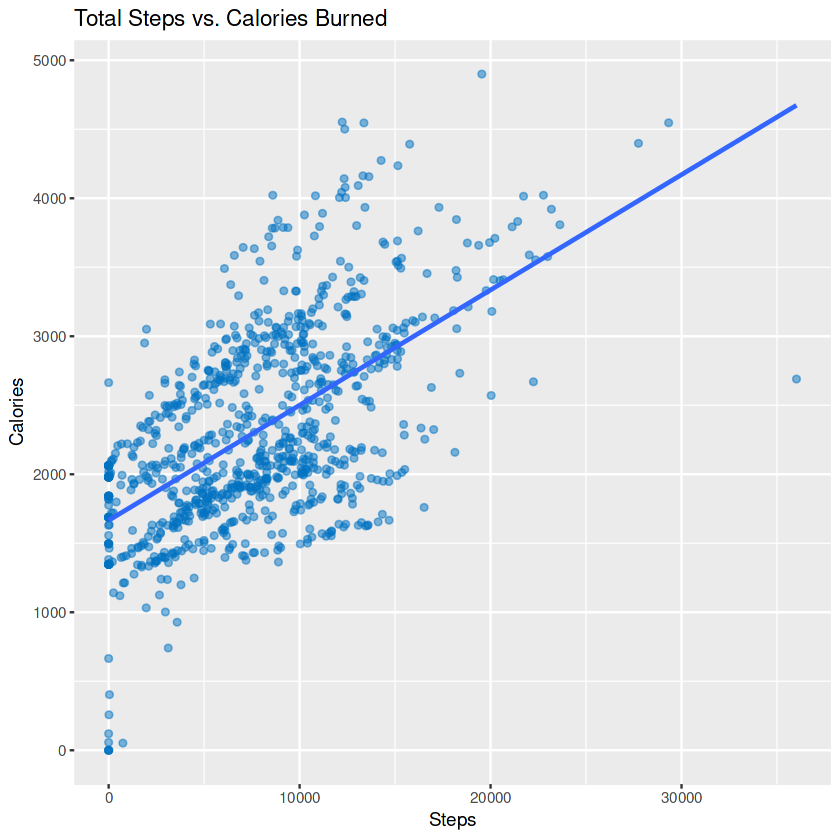

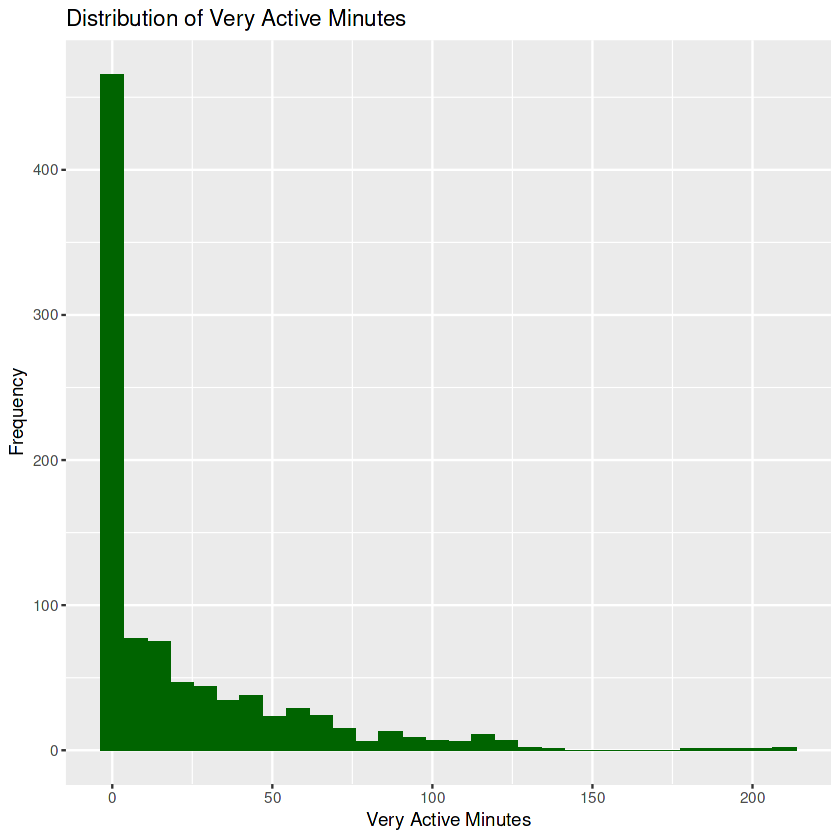

In [5]:
# Activity vs Calories
ggplot(daily_activity, aes(x = total_steps, y = calories)) +
  geom_point(alpha = 0.5, color = "#0073C2FF") +
  geom_smooth(method = "lm", se = FALSE) +
  labs(title = "Total Steps vs. Calories Burned", x = "Steps", y = "Calories")

# Distribution of activity levels
ggplot(daily_activity) +
  geom_histogram(aes(x = very_active_minutes), fill = "darkgreen", bins = 30) +
  labs(title = "Distribution of Very Active Minutes", x = "Very Active Minutes", y = "Frequency")

### Key Insights for Bellabeat:

- The average user walks around **7,638 steps** and burns approximately **2,304 calories per day**.
- There is a strong positive correlation between total steps and calories burned.
- Most users have relatively low "very active minutes," suggesting moderate engagement.
- Bellabeat can encourage users to increase active minutes through gamification and smart nudges.

### Recommendation:
Design marketing strategies emphasizing how Bellabeat products promote **daily activity**, **goal tracking**, and **calorie awareness**.